In [9]:
#PHYS 213
#Assignment 5
#Anne Xie
#Student Number: 20125978

In [2]:
#Question 1
import numpy as np

def equation(x): #define function for the equation
    return np.sin(np.pi/2*x**2/2)

In [11]:
def rectArea(N): #define function to find the integral using the rectangle method
    xRange = [0,7] #set range for x values
    binSize = (xRange[1]-xRange[0])/N #determine eidth of each bin
    area = 0 #star area at 0
    for i in range(N): #loop through every bin
        area += equation(xRange[0] + i*binSize)*binSize #add the area found in the bin to the area
    return area

print ("The integral evaluated with 4 bins is", rectArea(4))
print ("The integral evaluated with 10 bins is", rectArea(10))
print ("The integral evaluated with 25 bins is", rectArea(25))
print ("The integral evaluated with 100 bins is", rectArea(100))

The integral evaluated with 4 bins is 1.4233773508904473
The integral evaluated with 10 bins is 0.6883383223219193
The integral evaluated with 25 bins is 0.6049112785012158
The integral evaluated with 100 bins is 0.6204565821206479


In [12]:
def trapArea(N): #define function to find the integral usingt the trapazoid method
    xRange = [0,7] #set the range for the x values
    binSize = (xRange[1]-xRange[0])/N #determine the width of each bin
    area = (equation(xRange[0]) + equation(xRange[1]))/2 #start the area with the difference between the last and first point
    for i in range(N): #loop through each bin
        area += equation(xRange[0] + i*binSize) #add the area found under each bin 
    return area*binSize #multiple the area by the size of each bin

print ("The integral evaluated with 4 bins is", trapArea(4))
print ("The integral evaluated with 10 bins is", trapArea(10))
print ("The integral evaluated with 25 bins is", trapArea(25))
print ("The integral evaluated with 100 bins is", trapArea(100))

The integral evaluated with 4 bins is 2.0420957844286733
The integral evaluated with 10 bins is 0.9358256957372096
The integral evaluated with 25 bins is 0.7039062278673326
The integral evaluated with 100 bins is 0.6452053194621771


In [13]:
def simpArea(N): #define a function to find the integral using Simpson's method
    xRange = [0,7] #set the range for the x values
    binSize = (xRange[1]-xRange[0])/N #determine the size of each bin
    area = 0 #start area as 0
    for i in range(1,N,2): #loop through every second bin from 1 to the last bin
        bin0 = xRange[0] + (i-1)*binSize  #find the area for the first three bins
        bin1 = xRange[0] + i*binSize
        bin2 = xRange[0] + (i+1)*binSize
        area += equation(bin0) + 4*equation(bin1) + equation(bin2) #add up area
    if (N%2) != 0: #takes care if the number of bins is odd
        area += 3/2*(equation(xRange[1]) + equation(xRange[1] - binSize))
    return area*binSize/3 #multiply the area by the bin size and divide by three

print ("The integral evaluated with 4 bins is", simpArea(4))
print ("The integral evaluated with 10 bins is", simpArea(10))
print ("The integral evaluated with 25 bins is", simpArea(25))
print ("The integral evaluated with 100 bins is", simpArea(100))

The integral evaluated with 4 bins is 2.5379207992315624
The integral evaluated with 10 bins is 0.4515097874636505
The integral evaluated with 25 bins is 0.933703171728946
The integral evaluated with 100 bins is 0.6418564475682186


The angle at three seconds is -0.19967822043705422


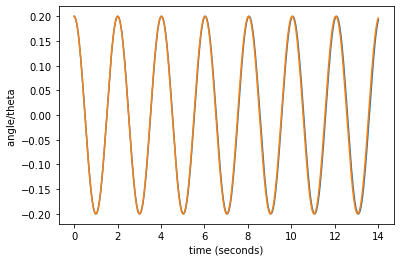

In [5]:
#Question 2

import matplotlib.pyplot as plt

def perfect(theta): 
    g = 9.8
    l = 1
    return -g*np.sin(theta)/l

def pancake(z): 
    return z

xTrials = []
yTrials = []
zTrials = []

def RK(x0,y0,z0,h,N): #define function for the Runge-Kutta 4 method
    xTrials.clear()
    yTrials.clear()
    zTrials.clear()
    #set starting points
    x = x0  
    y = y0 
    z = z0 
    #all the x, y, z, values will be stored in lists
    xTrials.append(x0)
    yTrials.append(y0)
    zTrials.append(z0)
    for i in range(N): #loop to go through iterations
        x = x + h #take a small step in x
        #find the slope using Euler's method
        L1 = h*perfect(yTrials[-1])
        k1 = h*pancake(zTrials[-1])
        
        #find the slopes using given values
        L2 = h*perfect(yTrials[-1] + k1/2)
        k2 = h*pancake(zTrials[-1] + L1/2)
        
        L3 = h*perfect(yTrials[-1] + k2/2)
        k3 = h*pancake(zTrials[-1] + L2/2)
        
        L4 = h*perfect(yTrials[-1] + k3)
        k4 = h*pancake(zTrials[-1] + L3)
        
        #update the new points using the slopes
        y = yTrials[-1] + (1/6)*(k1 + (2)*k2 + (2)*k3 + k4)
        z = zTrials[-1] + (1/6)*(L1 + (2)*L2 + (2)*L3 + L4)
        #add new points to the lists
        xTrials.append(x)
        yTrials.append(y)
        zTrials.append(z)
    return xTrials, yTrials, zTrials

xTrials, yTrials, zTrials = RK(0,0.2,0,0.04,350) #return value lists
#plot points
plt.plot(xTrials, yTrials)
plt.xlabel("time (seconds)")
plt.ylabel("angle/theta ")

def solve(t): #define a function for the solution
    g = 9.8
    l = 1
    return 0.2*np.cos(np.sqrt(g)*t/np.sqrt(l))

t_interval = np.arange(0,14,0.01) #set time range
thetaExact = solve(t_interval)
plt.plot(t_interval, thetaExact) #plot data

#find angle at 3 seconds
x3,y3,z3 = RK(0,0.2,0,0.03,100)
print ("The angle at three seconds is",y3[-1])

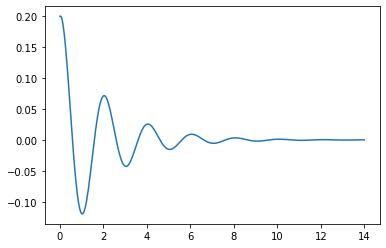

In [25]:
#Question 3

def diff(w):
    return w

def diff2(g,l,theta,b,w):
    return (-g*np.sin(theta)/l) - b*w
    
def euler(t0,theta0,y0,h,N): #define function for Euler's Method
    #make lists and enter in the starting values
    thetaList = [theta0]
    yList = [y0]
    time = [t0]
    for i in range(N): #Use for loop to iterate through each N
        t = time[-1] + h #Update all variables 
        theta = thetaList[-1] + h*diff(yList[-1])
        y = yList[-1] + h*diff2(9.8,1,theta,1.0, yList[-1])
        thetaList.append(theta) #add new "found"variables to list
        yList.append(y)
        time.append(t)
    return time, thetaList, yList #return lists of variables

#plot time vs theta 
time, theta, y = euler(0,0.2,0,0.04,350)
plt.plot(time, theta)